In [1]:
import sqlite3
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

In [3]:
 df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')

In [4]:
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')

### I combined my two data sets

In [5]:
#Join imdb_title_basics and imdb_title_principals table
new_df = pd.read_sql('''
    SELECT DISTINCT tconst, imdb_title_basics.*
    FROM imdb_title_basics JOIN imdb_title_principals
    USING(tconst)''', conn)


### I dropped tconst column and sorted by runtime minutes

In [6]:
#drop tconst column
df2 = new_df.drop("tconst", axis=1)

In [7]:
#runtime lowest to highest, shows there are NaN values
df2.sort_values(by=['runtime_minutes'])

,idx,primary_title,original_title,start_year,runtime_minutes,genres
71503,72190,Powered By Green Smoothies,Powered By Green Smoothies,2014,1.0,"Adventure,Documentary,Sport"
97514,98755,Isa One Minute Portrait,Isa One Minute Portrait,2016,1.0,Documentary
111033,113278,First and Last,First and Last,2016,1.0,"Documentary,War"
114595,116943,"Warnings missed? The crop circle of May 21, 2017","Warnings missed? The crop circle of May 21, 2017",2017,1.0,"Documentary,Horror,Mystery"
137916,140571,For A Better Life,For A Better Life,2018,1.0,"Documentary,Family"
...,...,...,...,...,...,...
143441,146131,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
143448,146138,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
143450,146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
143451,146141,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [8]:
# Only genre, runtime, and primary_title in table
data = [df2["genres"], df2["runtime_minutes"], df2["primary_title"]]
headers = ["genres", "runtime_minutes", "primary_title"]
runtime = pd.concat(data, axis=1, keys=headers)
runtime

,genres,runtime_minutes,primary_title
0,"Action,Crime,Drama",175.0,Sunghursh
1,"Biography,Drama",114.0,One Day Before the Rainy Season
2,Drama,122.0,The Other Side of the Wind
3,"Comedy,Drama",NaN,Sabse Bada Sukh
4,"Comedy,Drama,Fantasy",80.0,The Wandering Soap Opera
...,...,...,...
143449,Drama,123.0,Kuambil Lagi Hatiku
143450,Documentary,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro
143451,Comedy,NaN,Dankyavar Danka
143452,None,116.0,6 Gunn


### I found the median of each genres runtime

In [9]:
#Only rows in the Drama genre
Drama = runtime.loc[runtime['genres'] == 'Drama']

In [10]:
#Drama runtime median
Drama_median = Drama["runtime_minutes"].median()

In [11]:
#Only rows in the Horror genre
Horror = runtime.loc[runtime['genres'] == 'Horror']

In [12]:
#Horror runtime median
Horror_median = Horror["runtime_minutes"].median()

In [13]:
#Only rows in the Action genre
Action = runtime.loc[runtime['genres'] == 'Action']

In [14]:
#Action runtime median
Action_median = Action["runtime_minutes"].median()

In [15]:
#Only rows in the Comedy genre
Comedy = runtime.loc[runtime['genres'] == 'Comedy']

In [16]:
#Comedy runtime median
Comedy_median = Comedy["runtime_minutes"].median()

In [17]:
#Dictionary with each genre and runtime median
genre_runtime_median = {'Genre': ['Drama', 'Horror', 'Action', 'Comedy'],
                        'runtime_median': [92,85,93,91]
                        }
genre_runtime_avg = pd.DataFrame(genre_runtime_median, columns = ['Genre', 'runtime_median'])
genre_runtime_avg

,Genre,runtime_median
0,Drama,92
1,Horror,85
2,Action,93
3,Comedy,91


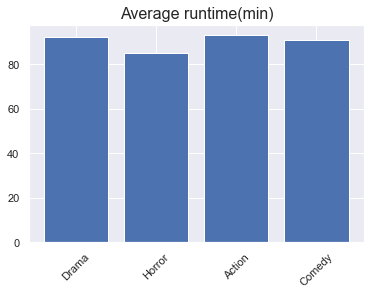

In [18]:
#Bar graph with genre and runtime median
plt.bar(x=genre_runtime_median['Genre'],
 
        height=genre_runtime_median['runtime_median'])
color='midnightblue'
plt.xticks(rotation=45)
plt.title('Average runtime(min)', fontsize=16)
plt.savefig('Avg runtime bar graph')

### I joined movie_budgets and title_basics and droped idx and tconst columns

In [19]:
#Join tn_movie_budgets and imdb_title basics tables
new_df4 = pd.read_sql('''SELECT *
FROM tn_movie_budgets
    INNER JOIN imdb_title_basics ON movie = primary_title;''',conn)


In [20]:
#Drop idx column
no_idx_4 = new_df4.drop("idx", axis=1)

In [21]:
#Drop tconst column
no_tconst = no_idx_4.drop("tconst", axis=1)

In [22]:
#Show only rows with genres being Drama, Horror, Action, or Comedy
values=['Drama','Horror', 'Action', 'Comedy']
df_genres = no_tconst[no_tconst.genres.isin(values)]
df_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,Abatâ,2011,93.0,Horror
63,77,"Jun 22, 2012",Brave,"$185,000,000","$237,282,182","$554,606,532",Brave,Brave,2014,NaN,Drama
85,98,"Jun 19, 2015",Inside Out,"$175,000,000","$356,461,711","$854,235,992",Inside Out,Inside Out,2011,NaN,Drama
95,2,"Nov 22, 2017",Coco,"$175,000,000","$209,726,015","$798,008,101",Coco,Coco,2017,98.0,Horror
162,3,"Apr 8, 2005",Sahara,"$145,000,000","$68,671,925","$121,671,925",Sahara,Sahara,2015,NaN,Drama
...,...,...,...,...,...,...,...,...,...,...,...
3793,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",Emily,Emily,2017,83.0,Drama
3797,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",Exeter,Exeter,2014,NaN,Horror
3799,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,Ten,Ten,2013,118.0,Drama
3807,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama


In [23]:
#Show only the movie, production_budget, worldwide_gross and genres columns
data2 = [df_genres["movie"], df_genres["production_budget"], df_genres["worldwide_gross"], df_genres["genres"]]
headers = ["movie", "production_budget", "worldwide_gross", "genres"]
genre_budget = pd.concat(data2, axis=1, keys=headers)
genre_budget

,movie,production_budget,worldwide_gross,genres
0,Avatar,"$425,000,000","$2,776,345,279",Horror
63,Brave,"$185,000,000","$554,606,532",Drama
85,Inside Out,"$175,000,000","$854,235,992",Drama
95,Coco,"$175,000,000","$798,008,101",Horror
162,Sahara,"$145,000,000","$121,671,925",Drama
...,...,...,...,...
3793,Emily,"$27,000","$3,547",Drama
3797,Exeter,"$25,000","$489,792",Horror
3799,Ten,"$25,000",$0,Drama
3807,Stories of Our Lives,"$15,000",$0,Drama


### I removed dollar signs and commas from both data sets and merged them

In [24]:
#remove $ and , in production_budget column
no_dollar_sign = genre_budget['production_budget'].str.replace('$', '').str.replace(',', '')
df3 = pd.DataFrame(no_dollar_sign)
df3

<ipython-input-24-0c5d6a5ffeff>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  no_dollar_sign = genre_budget['production_budget'].str.replace('$', '').str.replace(',', '')


,production_budget
0,425000000
63,185000000
85,175000000
95,175000000
162,145000000
...,...
3793,27000
3797,25000
3799,25000
3807,15000


In [25]:
#remove $ and , in worldwide_gross column
no_dollar_sign2 = genre_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '')
df5 = pd.DataFrame(no_dollar_sign2)
df5

<ipython-input-25-305559b0b7fc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  no_dollar_sign2 = genre_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '')


,worldwide_gross
0,2776345279
63,554606532
85,854235992
95,798008101
162,121671925
...,...
3793,3547
3797,489792
3799,0
3807,0


In [26]:
#merge no_dollar_sign and no_dollar_sign2
df13 = pd.concat([no_dollar_sign, no_dollar_sign2], axis=1)
df13

,production_budget,worldwide_gross
0,425000000,2776345279
63,185000000,554606532
85,175000000,854235992
95,175000000,798008101
162,145000000,121671925
...,...,...
3793,27000,3547
3797,25000,489792
3799,25000,0
3807,15000,0


In [27]:
#show only genre column
just_genre = genre_budget[['genres']]

In [28]:
# show only movie column
just_movie = genre_budget[['movie']]

In [29]:
#merge df13(no_dollar_sign) and just_genre
df14 = pd.concat([df13, just_genre], axis=1)

In [30]:
#merge df14 and just_movie
df15 = pd.concat([df14, just_movie ], axis=1)
df15

,production_budget,worldwide_gross,genres,movie
0,425000000,2776345279,Horror,Avatar
63,185000000,554606532,Drama,Brave
85,175000000,854235992,Drama,Inside Out
95,175000000,798008101,Horror,Coco
162,145000000,121671925,Drama,Sahara
...,...,...,...,...
3793,27000,3547,Drama,Emily
3797,25000,489792,Horror,Exeter
3799,25000,0,Drama,Ten
3807,15000,0,Drama,Stories of Our Lives


### I found the median of each genres production_budget and adds it to a dictionary

In [31]:
#Shows movie, production_budget, worldwide_gross, and genres for Horror movies
Horror_2 = df15.loc[df15['genres'] == 'Horror']

In [32]:
#Finds median of production_budget for horror movies
Horror_production_budget_median = Horror_2["production_budget"].median()
Horror_production_budget_median

9900000.0

In [33]:
#Shows movie, production_budget, worlwide_gross, and genres for Drama movies
Drama_2 = df15.loc[df15['genres'] == 'Drama']

In [34]:
#finds median of production_budget for Drama
Drama_production_budget_median = Drama_2["production_budget"].median()
Drama_production_budget_median

12000000.0

In [35]:
#Shows movie, production_budget, worlwide_gross, and genres for Action movies
Action_2 = df15.loc[df15['genres'] == 'Action']

In [36]:
#finds median of production_budget for Action
Action_production_budget_median = Action_2["production_budget"].median()
Action_production_budget_median

24500000.0

In [37]:
#Shows movie, production_budget, worlwide_gross, and genres for Comedy movies
Comedy_2 = df15.loc[df15['genres'] == 'Comedy']

In [38]:
#finds the median of production_budget for Comedy
Comedy_production_budget_median = Comedy_2["production_budget"].median()
Comedy_production_budget_median

20000000.0

In [39]:
#Dictionary with Drama, Horror, Action, Comedy medians only production_budget
genere_production_budget_median = {'Genre': ['Drama', 'Horror', 'Action', 'Comedy'],
                                  'production_budget_median': [12000000,9900000,24500000,20000000]
                                  }
genre_production_budget_avg2 = pd.DataFrame(genere_production_budget_median, columns = ['Genre', 'production_budget_median'])
genre_production_budget_avg2

,Genre,production_budget_median
0,Drama,12000000
1,Horror,9900000
2,Action,24500000
3,Comedy,20000000


### I found the median of each genre for worldwide_gross and added it to a dictionary

In [40]:
#Finds median of worldwide_gross for horror movies
Horror_worldwide_gross_median = Horror_2["worldwide_gross"].median()
Horror_worldwide_gross_median

14805812.0

In [41]:
#Finds median of worldwide_gross for Drama movies
Drama_worldwide_gross_median = Drama_2["worldwide_gross"].median()
Drama_worldwide_gross_median

11826980.0

In [42]:
#Finds median of worldwide_gross for Action movies
Action_worldwide_gross_median = Action_2["worldwide_gross"].median()
Action_worldwide_gross_median

29766753.5

In [43]:
#Finds median of worldwide_gross for Comedy movies
Comedy_worldwide_gross_median = Comedy_2["worldwide_gross"].median()
Comedy_worldwide_gross_median

28508010.0

In [44]:
#Dictionary with Drama, Horror, Action, Comedy medians only for worlwide_gross
genre_worldwide_gross_median = {'Genre': ['Drama', 'Horror', 'Action', 'Comedy'],
                                 'worldwide_gross_median': [11826980,14805812,29766753,28508010]
                                }
genre_worldwide_gross_avg = pd.DataFrame(genre_worldwide_gross_median, columns = ['Genre', 'worldwide_gross_median'])
genre_worldwide_gross_avg

,Genre,worldwide_gross_median
0,Drama,11826980
1,Horror,14805812
2,Action,29766753
3,Comedy,28508010


### I converted both dictionaries to a dataframe and merged them

In [45]:
#convert to dataframe genere_worldwide_gross_avg from Dictionary
genre_worldwide_gross_avg_df = pd.DataFrame.from_dict(genre_worldwide_gross_avg)
genre_worldwide_gross_avg_df

,Genre,worldwide_gross_median
0,Drama,11826980
1,Horror,14805812
2,Action,29766753
3,Comedy,28508010


In [46]:
#covert to df genere_production_budget_avg2 from dictionary
genre_production_budget_avg_df = pd.DataFrame.from_dict(genre_production_budget_avg2)
genre_production_budget_avg_df

,Genre,production_budget_median
0,Drama,12000000
1,Horror,9900000
2,Action,24500000
3,Comedy,20000000


In [47]:
#combine genere_production_budget_avg2 and genere_worldwide_gross_avg
genre_production_budget_avg_df['worldwide_gross_median'] = genre_worldwide_gross_avg_df['worldwide_gross_median']
budget_worldwide_gross_combined = genre_production_budget_avg_df
budget_worldwide_gross_combined

,Genre,production_budget_median,worldwide_gross_median
0,Drama,12000000,11826980
1,Horror,9900000,14805812
2,Action,24500000,29766753
3,Comedy,20000000,28508010


### I created a grouped bar graph showing the medians for each genre

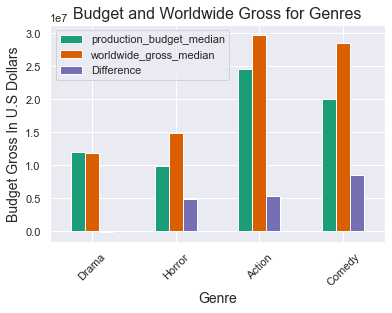

In [58]:
#Grouped bar graph for each Genre and its median production_budget and worldwide_gross_median# final
budget_worldwide_gross_combined.set_index('Genre').plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Budget Gross In U.S Dollars", size=14)
plt.xlabel("Genre", size=14)
plt.title("Budget and Worldwide Gross for Genres", size=16)
plt.show()

/Users/gabrielwarner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


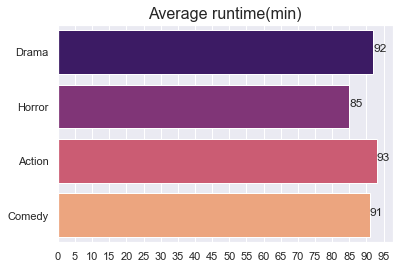

In [54]:
#Average runtime(min) bar graph final
sns.set_style('darkgrid')
plt.title('Average runtime(min)', fontsize=16)
x = genre_runtime_median['Genre']
y = genre_runtime_median['runtime_median']
plt.locator_params(axis="x", nbins=20)
sns.barplot(y, x, palette = "magma")
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

### I added a differnce column to budget_worldwide_gross_combined and turned it into a bar graph

In [51]:
#add a differnce column
budget_worldwide_gross_combined['Difference'] = budget_worldwide_gross_combined['worldwide_gross_median'] - budget_worldwide_gross_combined['production_budget_median']
budget_worldwide_gross_combined

,Genre,production_budget_median,worldwide_gross_median,Difference
0,Drama,12000000,11826980,-173020
1,Horror,9900000,14805812,4905812
2,Action,24500000,29766753,5266753
3,Comedy,20000000,28508010,8508010


/Users/gabrielwarner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


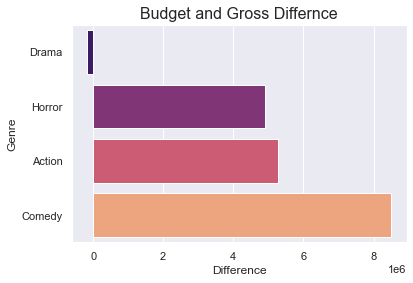

In [56]:
#Bar graph showing the diff for each genre
sns.set_style('darkgrid')
plt.title('Budget and Gross Differnce', fontsize=16)
x = budget_worldwide_gross_combined['Genre']
y = budget_worldwide_gross_combined['Difference']
plt.locator_params(axis="x", nbins=8)
sns.barplot(y, x, palette = "magma")
plt.show()